In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pickle
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, f1_score

from tensorflow import keras
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


In [ ]:
#load dataset
data = pd.read_excel('Book1.xlsx', sheet_name='Sheet1') #data train

#read dataset
data

X1        X2          X3         X4         X5     X6     X7    X8  \
0    60596  0.500099  207.300000  23.000000  76.000000   8059   6256  3066   
1   128760  0.502985  263.866286  23.924656  78.506890  15629  11147  6298   
2    95826  0.503444   60.500000  23.000000  79.000000  12173   9872  5068   
3    28686  0.498013  262.100000  23.800000  76.000000   4403   3419  1775   
4   123761  0.507115   41.600000  24.000000  77.000000   9323   8311  5824   
5    77385  0.499800   87.700000  24.000000  73.000000  10600   9113  3923   
6    98942  0.500588  192.924035  23.900231  80.800463  11063   8283  4216   
7    70261  0.498313  327.300000  24.000000  82.000000  12820  10587  5245   
8    53992  0.506538  207.600000  23.900000  73.000000   5777   4120  2196   
9   112583  0.501355  327.300000  23.600000  82.000000  10904   8084  3880   
10  120741  0.501371  262.100000  23.700000  77.000000  18473  11181  6185   
11   78954  0.507196  304.595028  24.086616  78.244108   9267   5536  3155   
12  142494  0.509396  171.029778  23.410064  80.075477  15597   6330  3872   
13  130396  0.501633  336.600000  23.900000  79.000000  17693  12076  6454   
14  136991  0.506491  178.335467  23.800000  80.251659  17410  15623  6762   
15   40886  0.503253  336.600000  23.700000  76.000000   5194   4569  2061   
16  128094  0.503535  234.269810  23.934688  78.306236  14789  10769  6235   
17   40035  0.501137   41.600000  23.000000  77.000000   5087   4830  2069   
18   72107  0.503543  297.500000  23.800000  73.000000   6794   6219  3104   
19  135114  0.506187  262.100000  24.000000  76.000000  17169  15920  6747   
20   77750  0.500746  290.800000  24.000000  81.000000  13442  10377  4968   
21   86851  0.507087  327.300000  23.900000  77.000000   8752   4815  2831   
22  123644  0.506768   47.482257  23.989036  77.109641   9851   8523  5865   
23   37469  0.500734  207.600000  23.700000  79.000000   4950   4635  2197   
24   99288  0.500272  207.600000  24.000000  81.000000  10940   8107  4122   
25   25324  0.508569  207.600000  23.000000  83.000000   1789   1906  1052   
26  137521  0.506897  192.684827  23.800000  80.597705  17166  14433  6385   
27   73495  0.500578  297.500000  23.900000  83.000000   7810   6919  3801   
28  114318  0.501671   30.300000  24.000000  83.000000  17632  12211  6403   
29   87977  0.502950  207.600000  24.000000  83.000000  10444   8955  4563   

       X9    X10  ...        X18    X19    X20   X21    X22    X23    X24  \
0   11310   6252  ...  74.400000   4824   4513  1949   7152   2949   4358   
1   19318  16672  ...  74.400000   8878   7847  5760  15249  20070  20479   
2   18007  10274  ...  74.400000   8606   4539  2716   8353  15527  13094   
3    5764   2131  ...  74.400000   4787   4354  2067   7949   3019   4585   
4   16256  18883  ...  74.400000   5019   4267  1945   6570   4049   5282   
5   14595   8002  ...  74.400000  12363   8543  4256  14923   7381   9893   
6   15416  10957  ...  74.400000  15525   5783  3640  11770  29541  23064   
7   17127   6597  ...  78.895908   9587   6028  3374  10606   9151  10899   
8    8165   7637  ...  77.865900  15622   5861  3649  11966  28690  23451   
9   14358  10587  ...  74.400000  10872   7738  3954  14483  11793  15320   
10  19059  12261  ...  77.857785  12776   9923  5116  17980  11369  12801   
11   9919  11318  ...  74.400000  18700  10525  5885  17583  13585  20466   
12  12969  28256  ...  74.400000   5607   3840  2113   7812   8311   6835   
13  20321  15949  ...  74.400000  15819  13348  5793  20120   6016   7934   
14  22801  23473  ...  76.466780   8972   7970  5684  15468  19208  20180   
15   7077   3945  ...  76.214553   8676   4595  2725   8480  15259  13015   
16  18910  16966  ...  74.400000  10959   9190  4043  14594   8685   8257   
17   7535   2977  ...  77.401452  13017   9944  5136  17969  11807  12892   
18  10480   8841  ...  75.378256  11148   8191  4190  15232  11469  14736   
19  22605  23030  ...  80.219241  15533   5841  3

#Preprocessing

In [ ]:
# mengecek missing values
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
Y      0
dtype: int64

In [ ]:
data.dropna()

X1        X2          X3         X4         X5     X6     X7    X8  \
0    60596  0.500099  207.300000  23.000000  76.000000   8059   6256  3066   
1   128760  0.502985  263.866286  23.924656  78.506890  15629  11147  6298   
2    95826  0.503444   60.500000  23.000000  79.000000  12173   9872  5068   
3    28686  0.498013  262.100000  23.800000  76.000000   4403   3419  1775   
4   123761  0.507115   41.600000  24.000000  77.000000   9323   8311  5824   
5    77385  0.499800   87.700000  24.000000  73.000000  10600   9113  3923   
6    98942  0.500588  192.924035  23.900231  80.800463  11063   8283  4216   
7    70261  0.498313  327.300000  24.000000  82.000000  12820  10587  5245   
8    53992  0.506538  207.600000  23.900000  73.000000   5777   4120  2196   
9   112583  0.501355  327.300000  23.600000  82.000000  10904   8084  3880   
10  120741  0.501371  262.100000  23.700000  77.000000  18473  11181  6185   
11   78954  0.507196  304.595028  24.086616  78.244108   9267   5536  3155   
12  142494  0.509396  171.029778  23.410064  80.075477  15597   6330  3872   
13  130396  0.501633  336.600000  23.900000  79.000000  17693  12076  6454   
14  136991  0.506491  178.335467  23.800000  80.251659  17410  15623  6762   
15   40886  0.503253  336.600000  23.700000  76.000000   5194   4569  2061   
16  128094  0.503535  234.269810  23.934688  78.306236  14789  10769  6235   
17   40035  0.501137   41.600000  23.000000  77.000000   5087   4830  2069   
18   72107  0.503543  297.500000  23.800000  73.000000   6794   6219  3104   
19  135114  0.506187  262.100000  24.000000  76.000000  17169  15920  6747   
20   77750  0.500746  290.800000  24.000000  81.000000  13442  10377  4968   
21   86851  0.507087  327.300000  23.900000  77.000000   8752   4815  2831   
22  123644  0.506768   47.482257  23.989036  77.109641   9851   8523  5865   
23   37469  0.500734  207.600000  23.700000  79.000000   4950   4635  2197   
24   99288  0.500272  207.600000  24.000000  81.000000  10940   8107  4122   
25   25324  0.508569  207.600000  23.000000  83.000000   1789   1906  1052   
26  137521  0.506897  192.684827  23.800000  80.597705  17166  14433  6385   
27   73495  0.500578  297.500000  23.900000  83.000000   7810   6919  3801   
28  114318  0.501671   30.300000  24.000000  83.000000  17632  12211  6403   
29   87977  0.502950  207.600000  24.000000  83.000000  10444   8955  4563   

       X9    X10  ...        X18    X19    X20   X21    X22    X23    X24  \
0   11310   6252  ...  74.400000   4824   4513  1949   7152   2949   4358   
1   19318  16672  ...  74.400000   8878   7847  5760  15249  20070  20479   
2   18007  10274  ...  74.400000   8606   4539  2716   8353  15527  13094   
3    5764   2131  ...  74.400000   4787   4354  2067   7949   3019   4585   
4   16256  18883  ...  74.400000   5019   4267  1945   6570   4049   5282   
5   14595   8002  ...  74.400000  12363   8543  4256  14923   7381   9893   
6   15416  10957  ...  74.400000  15525   5783  3640  11770  29541  23064   
7   17127   6597  ...  78.895908   9587   6028  3374  10606   9151  10899   
8    8165   7637  ...  77.865900  15622   5861  3649  11966  28690  23451   
9   14358  10587  ...  74.400000  10872   7738  3954  14483  11793  15320   
10  19059  12261  ...  77.857785  12776   9923  5116  17980  11369  12801   
11   9919  11318  ...  74.400000  18700  10525  5885  17583  13585  20466   
12  12969  28256  ...  74.400000   5607   3840  2113   7812   8311   6835   
13  20321  15949  ...  74.400000  15819  13348  5793  20120   6016   7934   
14  22801  23473  ...  76.466780   8972   7970  5684  15468  19208  20180   
15   7077   3945  ...  76.214553   8676   4595  2725   8480  15259  13015   
16  18910  16966  ...  74.400000  10959   9190  4043  14594   8685   8257   
17   7535   2977  ...  77.401452  13017   9944  5136  17969  11807  12892   
18  10480   8841  ...  75.378256  11148   8191  4190  15232  11469  14736   
19  22605  23030  ...  80.219241  15533   5841  3

In [ ]:
# menampilkan nilai korelasi atribut terhadap target
corr = data.corr()
correlation = (pd.DataFrame(corr.Y))
correlation.sort_values(by='Y', ascending=False).style.background_gradient(cmap='coolwarm_r')

2    27
1     3
Name: Y, dtype: int64


<Axes: xlabel='Y', ylabel='count'>

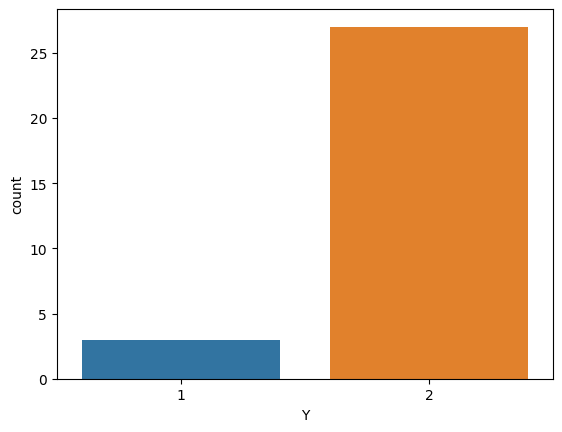

In [ ]:
# menampilkan persebaran label class
print(data['Y'].value_counts())

# plot persebaran label class
sns.countplot(data=data, x='Y')

In [ ]:
# menampilkan statistik dataset
data.describe()

X1         X2          X3         X4         X5  \
count      30.000000  30.000000   30.000000  30.000000  30.000000   
mean    91341.366667   0.503275  213.979583  23.758176  78.663073   
std     35962.663400   0.003180   96.696940   0.334828   2.994140   
min     25324.000000   0.498013   30.300000  23.000000  73.000000   
25%     70722.500000   0.500737  181.922807  23.700000  77.000000   
50%     91901.500000   0.502967  207.600000  23.900000  78.753445   
75%    123731.750000   0.506526  295.825000  24.000000  80.950116   
max    142494.000000   0.509396  336.600000  24.086616  83.000000   

                 X6            X7           X8            X9           X10  \
count     30.000000     30.000000    30.000000     30.000000     30.000000   
mean   11033.333333   8437.533333  4344.066667  14499.833333  11860.933333   
std     4695.684646   3570.409353  1726.434355   5385.481102   6922.383160   
min     1789.000000   1906.000000  1052.000000   3376.000000   2131.000000   
25%     7872.250000   5706.750000  3075.500000  10059.250000   7662.250000   
50%    10752.000000   8297.000000  4169.000000  15272.500000  10697.000000   
75%    15395.000000  10723.500000  6105.000000  18684.250000  16491.250000   
max    18473.000000  15920.000000  6762.000000  22801.000000  28256.000000   

       ...        X18           X19           X20          X21           X22  \
count  ...  30.000000     30.000000     30.000000    30.000000     30.000000   
mean   ...  75.552452  11350.200000   8147.233333  4161.600000  13903.133333   
std    ...   1.849419   4272.416916   3618.142900  1562.102222   5082.484959   
min    ...  74.400000   1484.000000   1600.000000   855.000000   2868.000000   
25%    ...  74.400000   8901.500000   5581.250000  3238.250000   9973.000000   
50%    ...  74.400000  11053.500000   7792.500000  3998.500000  14538.500000   
75%    ...  76.185438  15321.000000   9938.750000  5669.750000  17872.500000   
max    ...  80.562190  18700.000000  15814.000000  6713.000000  22483.000000   

                X23           X24           X25           X26          Y  
count     30.000000     30.000000     30.000000     30.000000  30.000000  
mean   13310.666667  13861.033333  28911.200000  42772.366667   1.900000  
std     7860.908258   6299.649259   9437.967313  15279.254465   0.305129  
min     2949.000000   3717.000000   8186.000000  11903.000000   1.000000  
25%     8404.500000   8666.000000  23175.250000  31931.250000   2.000000  
50%    11419.000000  12953.500000  33195.500000  46042.500000   2.000000  
75%    18287.750000  20394.500000  36005.750000  57559.000000   2.000000  
max    29541.000000  23451.000000  42466.000000  62932.000000   2.000000  

[8 rows x 27 columns]

In [ ]:
# copy dataset train
X = data.copy()

y = X['Y'] #data target
X.drop(columns=['Y'], inplace = True) #feature

# menampilkan data
X.head()
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Y, dtype: int64

#Pemodelan

In [ ]:
# Membagi data kedalam 10 folds.
# Lalu menggunakan variabel 'kf'(StratiFiedKFold splitting stratergy) sebagai input ke fungsi cross_val_score()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

i = 1
# metode split() menghasilkan indeks untuk membagi data menjadi set pelatihan dan pengujian.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{i}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    i+=1


Fold:1, Train set: 27, Test set:3
Fold:2, Train set: 27, Test set:3
Fold:3, Train set: 27, Test set:3
Fold:4, Train set: 27, Test set:3
Fold:5, Train set: 27, Test set:3
Fold:6, Train set: 27, Test set:3
Fold:7, Train set: 27, Test set:3
Fold:8, Train set: 27, Test set:3
Fold:9, Train set: 27, Test set:3
Fold:10, Train set: 27, Test set:3


##Feature Selection with SelectKBest

In [ ]:
# Pemilihan fitur yang paling penting menggunakan SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

X_new = X
y = y

selector = SelectKBest(f_classif, k=26)
selector.fit(X_new, y)

X_fs = selector.transform(X_new)
print("The 39 most important features are:", X_new.columns[selector.get_support(indices=True)])

The 39 most important features are: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26'],
      dtype='object')


In [ ]:
# menyimpan hasil skoring dan hasil fitur terbaik kedalam variabel lalu mengubahnya kedalam dataframe
df_scores = pd.DataFrame(selector.scores_)
df_best_feat = pd.DataFrame(X_new.columns)

In [ ]:
# menggabungkan 2 data frame skoring dan fitur terbaik
feature_scores = pd.concat([df_best_feat, df_scores],axis=1)
feature_scores.columns = ['Feature','Score']  # memberikan nama pada kolom dataframe
feature_scores

Feature     Score
0       X1  0.012373
1       X2  0.520202
2       X3  0.057601
3       X4  1.862049
4       X5  0.069360
5       X6  0.087565
6       X7  0.074693
7       X8  0.086583
8       X9  0.089938
9      X10  0.191829
10     X11  0.000007
11     X12  0.128975
12     X13  0.056043
13     X14  0.023399
14     X15  2.605758
15     X16  0.219356
16     X17  2.172123
17     X18  0.021748
18     X19  0.012462
19     X20  0.162276
20     X21  0.061709
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
24     X25  0.098850
25     X26  0.000040

#Eksperimen

##Kombinasi 3 Fitur

In [ ]:
print(feature_scores.nlargest(3,'Score'))  #print 3 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049


In [ ]:
# mengambil 3 fitur terbaik
X3 = X[['X15', 'X17', 'X4']]
X3.head()

X15   X17         X4
0  0.503399  23.6  23.000000
1  0.507852  23.6  23.924656
2  0.507584  23.6  23.000000
3  0.501228  23.6  23.800000
4  0.504898  23.6  24.000000

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X3_normalized = scaler.fit_transform(X3)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score3RF = cross_val_score(RandomForestClassifier(n_estimators= count, min_samples_split=12,
                                                    random_state= 42), X3_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score3RF .mean())}')
print('Standard Deviation %0.4f' % (score3RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores3NB = cross_val_score(nb_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3NB.mean())}')
print('Standard Deviation %0.4f' % (scores3NB.std()))


Average score: 0.7667
Standard Deviation 0.3000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.8333
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X3_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy3DNN = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy3DNN )}')


Epoch 1/50
1/1 - 1s - loss: 1.1483 - accuracy: 0.0000e+00 - val_loss: 1.1165 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0888 - accuracy: 0.1905 - val_loss: 1.0501 - val_accuracy: 0.3333 - 47ms/epoch - 47ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0331 - accuracy: 0.6190 - val_loss: 0.9850 - val_accuracy: 0.6667 - 37ms/epoch - 37ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9813 - accuracy: 0.8095 - val_loss: 0.9225 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9324 - accuracy: 0.9048 - val_loss: 0.8617 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8853 - accuracy: 0.9524 - val_loss: 0.8027 - val_accuracy: 1.0000 - 56ms/epoch - 56ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8401 - accuracy: 0.9524 - val_loss: 0.7468 - val_accuracy: 1.0000 - 43ms/epoch - 43ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7973 - accuracy: 0.9524 - val_loss: 0.6941 - val_accuracy: 1.0000 - 39ms/epoch - 39ms/step
Epoch 9/50
1/1 - 0s - loss: 

##Kombinasi 4 Fitur

In [ ]:
print(feature_scores.nlargest(4,'Score'))  #print 4 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202


In [ ]:
# mengambil 4 fitur terbaik
X4 = X[['X15', 'X17', 'X4','X2']]
X4.head()

X15   X17         X4        X2
0  0.503399  23.6  23.000000  0.500099
1  0.507852  23.6  23.924656  0.502985
2  0.507584  23.6  23.000000  0.503444
3  0.501228  23.6  23.800000  0.498013
4  0.504898  23.6  24.000000  0.507115

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X4_normalized = scaler.fit_transform(X4)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score4RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X4_normalized , y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score4RF .mean())}')
print('Standard Deviation %0.4f' % (score4RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:

# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores4NB = cross_val_score(nb_classifier, X4_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4NB .mean())}')
print('Standard Deviation %0.4f' % (scores4NB .std()))

Average score: 0.8000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores4SVM = cross_val_score(svm_classifier, X4_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4SVM .mean())}')
print('Standard Deviation %0.4f' % (scores4SVM .std()))

Average score: 0.8333
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores4SVM = cross_val_score(svm_classifier, X4_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4SVM .mean())}')
print('Standard Deviation %0.4f' % (scores4SVM .std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores4SVM = cross_val_score(svm_classifier, X4_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4SVM .mean())}')
print('Standard Deviation %0.4f' % (scores4SVM .std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:


# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X4_normalized , y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy4DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy4DNN)}')

Epoch 1/50
1/1 - 2s - loss: 1.1049 - accuracy: 0.2857 - val_loss: 1.1111 - val_accuracy: 0.3333 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.0379 - accuracy: 0.4286 - val_loss: 1.0542 - val_accuracy: 0.6667 - 120ms/epoch - 120ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9739 - accuracy: 0.9048 - val_loss: 1.0018 - val_accuracy: 1.0000 - 120ms/epoch - 120ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9135 - accuracy: 0.9524 - val_loss: 0.9528 - val_accuracy: 1.0000 - 89ms/epoch - 89ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8570 - accuracy: 0.9524 - val_loss: 0.9049 - val_accuracy: 1.0000 - 140ms/epoch - 140ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8035 - accuracy: 0.9524 - val_loss: 0.8576 - val_accuracy: 1.0000 - 100ms/epoch - 100ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7526 - accuracy: 0.9524 - val_loss: 0.8105 - val_accuracy: 1.0000 - 108ms/epoch - 108ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7050 - accuracy: 0.9524 - val_loss: 0.7632 - val_accuracy: 1.0000 - 112ms/epoch - 112ms/step
Epoch 9/50
1/1 - 0s - lo

##Kombinasi 5 Fitur

In [ ]:
print(feature_scores.nlargest(5,'Score'))  #print 5 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882


In [ ]:
# mengambil 5 fitur terbaik
X5 = X[['X15', 'X17', 'X4','X2','X22']]
X5.head()

X15   X17         X4        X2    X22
0  0.503399  23.6  23.000000  0.500099   7152
1  0.507852  23.6  23.924656  0.502985  15249
2  0.507584  23.6  23.000000  0.503444   8353
3  0.501228  23.6  23.800000  0.498013   7949
4  0.504898  23.6  24.000000  0.507115   6570

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X5_normalized = scaler.fit_transform(X5)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score5RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X5_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score5RF .mean())}')
print('Standard Deviation %0.4f' % (score5RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores5NB = cross_val_score(nb_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5NB.mean())}')
print('Standard Deviation %0.4f' % (scores5NB.std()))

Average score: 0.8667
Standard Deviation 0.2211


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.8667
Standard Deviation 0.1633


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X5_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy5DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy5DNN)}')




Epoch 1/50
1/1 - 2s - loss: 1.2254 - accuracy: 0.0000e+00 - val_loss: 1.2576 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.1504 - accuracy: 0.1429 - val_loss: 1.1860 - val_accuracy: 0.0000e+00 - 105ms/epoch - 105ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0796 - accuracy: 0.3810 - val_loss: 1.1186 - val_accuracy: 0.0000e+00 - 140ms/epoch - 140ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0126 - accuracy: 0.6190 - val_loss: 1.0550 - val_accuracy: 0.0000e+00 - 151ms/epoch - 151ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9497 - accuracy: 0.6190 - val_loss: 0.9943 - val_accuracy: 0.6667 - 106ms/epoch - 106ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8907 - accuracy: 0.8095 - val_loss: 0.9357 - val_accuracy: 1.0000 - 110ms/epoch - 110ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8345 - accuracy: 0.9524 - val_loss: 0.8813 - val_accuracy: 1.0000 - 81ms/epoch - 81ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7818 - accuracy: 0.9524 - val_loss: 0.8290 - val_accuracy: 1.0000 - 135ms/epoch - 135ms/step
Epoc

##Kombinasi 6 Fitur

In [ ]:
print(feature_scores.nlargest(6,'Score'))  #print 6 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542


In [ ]:
# mengambil 6 fitur terbaik
X6 = X[['X15', 'X17', 'X4','X2','X22','X23']]
X6.head()

X15   X17         X4        X2    X22    X23
0  0.503399  23.6  23.000000  0.500099   7152   2949
1  0.507852  23.6  23.924656  0.502985  15249  20070
2  0.507584  23.6  23.000000  0.503444   8353  15527
3  0.501228  23.6  23.800000  0.498013   7949   3019
4  0.504898  23.6  24.000000  0.507115   6570   4049

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X6_normalized = scaler.fit_transform(X6)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score6RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42),X6_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score6RF .mean())}')
print('Standard Deviation %0.4f' % (score6RF .std()))

Average score(100): 0.8667
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores6NB = cross_val_score(nb_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6NB.mean())}')
print('Standard Deviation %0.4f' % (scores6NB.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.8333
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X6_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy6DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy6DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.3958 - accuracy: 0.0476 - val_loss: 1.3995 - val_accuracy: 0.0000e+00 - 812ms/epoch - 812ms/step
Epoch 2/50
1/1 - 0s - loss: 1.2978 - accuracy: 0.0952 - val_loss: 1.3023 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 3/50
1/1 - 0s - loss: 1.2071 - accuracy: 0.0952 - val_loss: 1.2114 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 4/50
1/1 - 0s - loss: 1.1227 - accuracy: 0.1429 - val_loss: 1.1281 - val_accuracy: 0.0000e+00 - 38ms/epoch - 38ms/step
Epoch 5/50
1/1 - 0s - loss: 1.0437 - accuracy: 0.4286 - val_loss: 1.0496 - val_accuracy: 0.6667 - 52ms/epoch - 52ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9696 - accuracy: 0.6190 - val_loss: 0.9762 - val_accuracy: 0.6667 - 56ms/epoch - 56ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8998 - accuracy: 0.8571 - val_loss: 0.9047 - val_accuracy: 1.0000 - 57ms/epoch - 57ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8347 - accuracy: 0.9524 - val_loss: 0.8390 - val_accuracy: 1.0000 - 55ms/epoch - 55ms/step
Epoch 9/50
1/1

##Kombinasi 7 Fitur

In [ ]:
print(feature_scores.nlargest(7,'Score'))  #print 7 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669


In [ ]:
# mengambil 7 fitur terbaik
X7 = X[['X15', 'X17', 'X4','X2','X22','X23','X24']]
X7.head()

X15   X17         X4        X2    X22    X23    X24
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X7_normalized = scaler.fit_transform(X7)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score7RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X7_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score7RF .mean())}')
print('Standard Deviation %0.4f' % (score7RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores7NB = cross_val_score(nb_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7NB.mean())}')
print('Standard Deviation %0.4f' % (scores7NB.std()))

Average score: 0.8667
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:


# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X7_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy7DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy7DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.3324 - accuracy: 0.0000e+00 - val_loss: 1.2937 - val_accuracy: 0.0000e+00 - 835ms/epoch - 835ms/step
Epoch 2/50
1/1 - 0s - loss: 1.2507 - accuracy: 0.0000e+00 - val_loss: 1.2099 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1738 - accuracy: 0.2381 - val_loss: 1.1269 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0998 - accuracy: 0.4286 - val_loss: 1.0480 - val_accuracy: 0.6667 - 53ms/epoch - 53ms/step
Epoch 5/50
1/1 - 0s - loss: 1.0290 - accuracy: 0.5714 - val_loss: 0.9744 - val_accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9621 - accuracy: 0.8095 - val_loss: 0.9037 - val_accuracy: 1.0000 - 31ms/epoch - 31ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8995 - accuracy: 0.9048 - val_loss: 0.8370 - val_accuracy: 1.0000 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8413 - accuracy: 0.9048 - val_loss: 0.7737 - val_accuracy: 1.0000 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1

1/1 [==============================] - 0s 59ms/step
Accuracy: 0.6667


##Kombinasi 8 Fitur

In [ ]:
print(feature_scores.nlargest(8,'Score'))  #print 8 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356


In [ ]:
# mengambil 8 fitur terbaik
X8 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16']]
X8.head()

X15   X17         X4        X2    X22    X23    X24    X16
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X8_normalized = scaler.fit_transform(X8)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score8RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X8_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score8RF .mean())}')
print('Standard Deviation %0.4f' % (score8RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores8NB = cross_val_score(nb_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8NB.mean())}')
print('Standard Deviation %0.4f' % (scores8NB.std()))

Average score: 0.8667
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.8333
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X8_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy8DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy8DNN)}')


Epoch 1/50
1/1 - 1s - loss: 1.0761 - accuracy: 0.4762 - val_loss: 1.0102 - val_accuracy: 0.6667 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 0.9801 - accuracy: 0.6667 - val_loss: 0.9245 - val_accuracy: 1.0000 - 66ms/epoch - 66ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8901 - accuracy: 0.8095 - val_loss: 0.8453 - val_accuracy: 1.0000 - 64ms/epoch - 64ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8064 - accuracy: 0.8571 - val_loss: 0.7730 - val_accuracy: 1.0000 - 68ms/epoch - 68ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7306 - accuracy: 0.9524 - val_loss: 0.7064 - val_accuracy: 1.0000 - 48ms/epoch - 48ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6614 - accuracy: 0.9524 - val_loss: 0.6444 - val_accuracy: 1.0000 - 62ms/epoch - 62ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5992 - accuracy: 0.9524 - val_loss: 0.5876 - val_accuracy: 1.0000 - 71ms/epoch - 71ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5430 - accuracy: 0.9524 - val_loss: 0.5352 - val_accuracy: 1.0000 - 67ms/epoch - 67ms/step
Epoch 9/50
1/1 - 0s - loss: 0.4928 -

1/1 [==============================] - 0s 102ms/step
Accuracy: 0.6667


##Kombinasi 9 Fitur

In [ ]:
print(feature_scores.nlargest(9,'Score'))  #print 9 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829


In [ ]:
# mengambil 9 fitur terbaik
X9 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10']]
X9.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X9_normalized = scaler.fit_transform(X9)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score9RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X9_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score9RF .mean())}')
print('Standard Deviation %0.4f' % (score9RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores9NB = cross_val_score(nb_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9NB.mean())}')
print('Standard Deviation %0.4f' % (scores9NB.std()))

Average score: 0.8667
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X9_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy9DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy9DNN)}')

Epoch 1/50
1/1 - 2s - loss: 1.0684 - accuracy: 0.1905 - val_loss: 0.8479 - val_accuracy: 0.6667 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.9780 - accuracy: 0.5714 - val_loss: 0.7303 - val_accuracy: 1.0000 - 60ms/epoch - 60ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8934 - accuracy: 0.8095 - val_loss: 0.6293 - val_accuracy: 1.0000 - 61ms/epoch - 61ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8153 - accuracy: 0.9048 - val_loss: 0.5410 - val_accuracy: 1.0000 - 64ms/epoch - 64ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7429 - accuracy: 0.9524 - val_loss: 0.4616 - val_accuracy: 1.0000 - 77ms/epoch - 77ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6762 - accuracy: 0.9524 - val_loss: 0.3926 - val_accuracy: 1.0000 - 64ms/epoch - 64ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6156 - accuracy: 0.9524 - val_loss: 0.3343 - val_accuracy: 1.0000 - 71ms/epoch - 71ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5609 - accuracy: 0.9524 - val_loss: 0.2844 - val_accuracy: 1.0000 - 63ms/epoch - 63ms/step
Epoch 9/50
1/1 - 0s - loss: 0.5115 -

##Kombinasi 10 Fitur

In [ ]:
print(feature_scores.nlargest(10,'Score'))  #print 10 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276


In [ ]:
# mengambil 10 fitur terbaik
X10 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20']]
X10.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20  
0  4513  
1  7847  
2  4539  
3  4354  
4  4267

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X10_normalized = scaler.fit_transform(X10)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score10RF = cross_val_score(RandomForestClassifier(n_estimators= count, min_samples_split=8,
                                                     random_state= 42), X10_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score10RF.mean())}')
print('Standard Deviation %0.4f' % (score10RF.std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores10NB = cross_val_score(nb_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10NB.mean())}')
print('Standard Deviation %0.4f' % (scores10NB.std()))

Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X10_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy10DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy10DNN)}')

Epoch 1/50
1/1 - 1s - loss: 0.8858 - accuracy: 0.8095 - val_loss: 1.1542 - val_accuracy: 0.3333 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 0.8089 - accuracy: 0.9524 - val_loss: 1.0578 - val_accuracy: 0.6667 - 89ms/epoch - 89ms/step
Epoch 3/50
1/1 - 0s - loss: 0.7376 - accuracy: 0.9524 - val_loss: 0.9674 - val_accuracy: 0.6667 - 62ms/epoch - 62ms/step
Epoch 4/50
1/1 - 0s - loss: 0.6726 - accuracy: 0.9524 - val_loss: 0.8803 - val_accuracy: 0.6667 - 63ms/epoch - 63ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6131 - accuracy: 0.9524 - val_loss: 0.7974 - val_accuracy: 1.0000 - 72ms/epoch - 72ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5585 - accuracy: 0.9524 - val_loss: 0.7197 - val_accuracy: 1.0000 - 67ms/epoch - 67ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5085 - accuracy: 0.9524 - val_loss: 0.6482 - val_accuracy: 1.0000 - 49ms/epoch - 49ms/step
Epoch 8/50
1/1 - 0s - loss: 0.4630 - accuracy: 0.9524 - val_loss: 0.5802 - val_accuracy: 1.0000 - 85ms/epoch - 85ms/step
Epoch 9/50
1/1 - 0s - loss: 0.4221 -

##Kombinasi 11 Fitur

In [ ]:
print(feature_scores.nlargest(11,'Score'))  #print 11 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975


In [ ]:
# mengambil 11 fitur terbaik
X11 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12']]
X11.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12  
0  4513  19650  
1  7847  43840  
2  4539  33958  
3  4354  10359  
4  4267  39284

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X11_normalized = scaler.fit_transform(X11)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score11RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X11_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score11RF .mean())}')
print('Standard Deviation %0.4f' % (score11RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores11NB= cross_val_score(nb_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11NB.mean())}')
print('Standard Deviation %0.4f' % (scores11NB.std()))

Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.7000
Standard Deviation 0.2333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X11_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy11DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy11DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.1186 - accuracy: 0.1905 - val_loss: 1.0024 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0365 - accuracy: 0.2857 - val_loss: 0.9279 - val_accuracy: 0.6667 - 47ms/epoch - 47ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9589 - accuracy: 0.5714 - val_loss: 0.8588 - val_accuracy: 1.0000 - 64ms/epoch - 64ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8855 - accuracy: 0.7619 - val_loss: 0.7937 - val_accuracy: 1.0000 - 63ms/epoch - 63ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8156 - accuracy: 0.9048 - val_loss: 0.7317 - val_accuracy: 1.0000 - 65ms/epoch - 65ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7510 - accuracy: 0.9524 - val_loss: 0.6721 - val_accuracy: 1.0000 - 51ms/epoch - 51ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6907 - accuracy: 0.9524 - val_loss: 0.6170 - val_accuracy: 1.0000 - 63ms/epoch - 63ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6342 - accuracy: 0.9524 - val_loss: 0.5657 - val_accuracy: 1.0000 - 73ms/epoch - 73ms/step
Epoch 9/50
1/1 - 0s - loss: 0.58

##Kombinasi 12 Fitur

In [ ]:
print(feature_scores.nlargest(12,'Score'))  #print 12 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850


In [ ]:
# mengambil 12 fitur terbaik
X12 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25']]
X12.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25  
0  4513  19650  12639  
1  7847  43840  38723  
2  4539  33958  24009  
3  4354  10359  14617  
4  4267  39284  10116

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X12_normalized = scaler.fit_transform(X12)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score12RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X12_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score12RF .mean())}')
print('Standard Deviation %0.4f' % (score12RF .std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores12NB = cross_val_score(nb_classifier,X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12NB.mean())}')
print('Standard Deviation %0.4f' % (scores12NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X12_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy12 = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy12)}')

Epoch 1/50
1/1 - 3s - loss: 0.9732 - accuracy: 0.6190 - val_loss: 0.8390 - val_accuracy: 0.6667 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 0.8744 - accuracy: 0.7143 - val_loss: 0.7570 - val_accuracy: 1.0000 - 174ms/epoch - 174ms/step
Epoch 3/50
1/1 - 0s - loss: 0.7837 - accuracy: 0.9048 - val_loss: 0.6806 - val_accuracy: 1.0000 - 183ms/epoch - 183ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7016 - accuracy: 0.9524 - val_loss: 0.6096 - val_accuracy: 1.0000 - 161ms/epoch - 161ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6275 - accuracy: 0.9524 - val_loss: 0.5445 - val_accuracy: 1.0000 - 170ms/epoch - 170ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5609 - accuracy: 0.9524 - val_loss: 0.4856 - val_accuracy: 1.0000 - 111ms/epoch - 111ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5013 - accuracy: 0.9524 - val_loss: 0.4324 - val_accuracy: 1.0000 - 161ms/epoch - 161ms/step
Epoch 8/50
1/1 - 0s - loss: 0.4486 - accuracy: 0.9524 - val_loss: 0.3852 - val_accuracy: 1.0000 - 149ms/epoch - 149ms/step
Epoch 9/50
1/1 - 0s - 

##Kombinasi 13 Fitur

In [ ]:
print(feature_scores.nlargest(13,'Score'))  #print 13 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938


In [ ]:
# mengambil 13 fitur terbaik
X13 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9']]
X13.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9  
0  4513  19650  12639  11310  
1  7847  43840  38723  19318  
2  4539  33958  24009  18007  
3  4354  10359  14617   5764  
4  4267  39284  10116  16256

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X13_normalized = scaler.fit_transform(X13)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score13rf = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X13_normalized , y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score13rf.mean())}')
print('Standard Deviation %0.4f' % (score13rf.std()))

Average score(100): 0.9000
Average score(200): 0.9000
Average score(300): 0.9000
Average score(400): 0.9000
Average score(500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores13NB = cross_val_score(nb_classifier, X13_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13NB.mean())}')
print('Standard Deviation %0.4f' % (scores13NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.7000
Standard Deviation 0.1795


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X13_normalized , y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy13 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy13)}')


Epoch 1/50
1/1 - 2s - loss: 1.3305 - accuracy: 0.1905 - val_loss: 1.2710 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.1996 - accuracy: 0.2857 - val_loss: 1.1329 - val_accuracy: 0.3333 - 93ms/epoch - 93ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0780 - accuracy: 0.4762 - val_loss: 1.0043 - val_accuracy: 0.3333 - 99ms/epoch - 99ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9664 - accuracy: 0.6190 - val_loss: 0.8847 - val_accuracy: 0.6667 - 73ms/epoch - 73ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8647 - accuracy: 0.7143 - val_loss: 0.7758 - val_accuracy: 1.0000 - 76ms/epoch - 76ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7735 - accuracy: 0.8095 - val_loss: 0.6772 - val_accuracy: 1.0000 - 67ms/epoch - 67ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6903 - accuracy: 0.9048 - val_loss: 0.5882 - val_accuracy: 1.0000 - 76ms/epoch - 76ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6146 - accuracy: 0.9048 - val_loss: 0.5082 - val_accuracy: 1.0000 - 63ms/epoch - 63ms/step
Epoch 9/50
1/1 - 0s - loss: 0.54

##Kombinasi 14 Fitur

In [ ]:
print(feature_scores.nlargest(14,'Score'))  #print 14 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565


In [ ]:
# mengambil 14 fitur terbaik
X14 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6']]
X14.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9     X6  
0  4513  19650  12639  11310   8059  
1  7847  43840  38723  19318  15629  
2  4539  33958  24009  18007  12173  
3  4354  10359  14617   5764   4403  
4  4267  39284  10116  16256   9323

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X14_normalized = scaler.fit_transform(X14)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score14rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X14_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score14rf.mean())}')
    print('Standard Deviation %0.4f' % (score14rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores14NB = cross_val_score(nb_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14NB.mean())}')
print('Standard Deviation %0.4f' % (scores14NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.6667
Standard Deviation 0.2108


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X14_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy14 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy14)}')


Epoch 1/50
1/1 - 1s - loss: 1.1664 - accuracy: 0.1905 - val_loss: 1.1432 - val_accuracy: 0.3333 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0522 - accuracy: 0.3810 - val_loss: 1.0432 - val_accuracy: 0.3333 - 66ms/epoch - 66ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9461 - accuracy: 0.6667 - val_loss: 0.9488 - val_accuracy: 1.0000 - 44ms/epoch - 44ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8486 - accuracy: 0.8095 - val_loss: 0.8580 - val_accuracy: 1.0000 - 62ms/epoch - 62ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7587 - accuracy: 0.9524 - val_loss: 0.7733 - val_accuracy: 1.0000 - 65ms/epoch - 65ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6771 - accuracy: 0.9524 - val_loss: 0.6963 - val_accuracy: 1.0000 - 44ms/epoch - 44ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6036 - accuracy: 0.9524 - val_loss: 0.6247 - val_accuracy: 1.0000 - 60ms/epoch - 60ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5378 - accuracy: 0.9524 - val_loss: 0.5590 - val_accuracy: 1.0000 - 71ms/epoch - 71ms/step
Epoch 9/50
1/1 - 0s - loss: 0.4797 -

##Kombinasi 15 Fitur

In [ ]:
print(feature_scores.nlargest(15,'Score'))  #print 15 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583


In [ ]:
# mengambil 15 fitur terbaik
X15 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8']]
X15.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9     X6    X8  
0  4513  19650  12639  11310   8059  3066  
1  7847  43840  38723  19318  15629  6298  
2  4539  33958  24009  18007  12173  5068  
3  4354  10359  14617   5764   4403  1775  
4  4267  39284  10116  16256   9323  5824

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X15_normalized = scaler.fit_transform(X15)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score15rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X15_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score15rf.mean())}')
    print('Standard Deviation %0.4f' % (score15rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores15NB = cross_val_score(nb_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15NB.mean())}')
print('Standard Deviation %0.4f' % (scores15NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))


Average score: 0.6667
Standard Deviation 0.2108


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X15_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy15 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy15)}')


Epoch 1/50
1/1 - 2s - loss: 1.5523 - accuracy: 0.0000e+00 - val_loss: 1.5447 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.4141 - accuracy: 0.0000e+00 - val_loss: 1.4256 - val_accuracy: 0.0000e+00 - 210ms/epoch - 210ms/step
Epoch 3/50
1/1 - 0s - loss: 1.2859 - accuracy: 0.0000e+00 - val_loss: 1.3120 - val_accuracy: 0.0000e+00 - 101ms/epoch - 101ms/step
Epoch 4/50
1/1 - 0s - loss: 1.1677 - accuracy: 0.1429 - val_loss: 1.2036 - val_accuracy: 0.3333 - 147ms/epoch - 147ms/step
Epoch 5/50
1/1 - 0s - loss: 1.0586 - accuracy: 0.3333 - val_loss: 1.1024 - val_accuracy: 0.3333 - 137ms/epoch - 137ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9596 - accuracy: 0.5238 - val_loss: 1.0110 - val_accuracy: 0.3333 - 111ms/epoch - 111ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8704 - accuracy: 0.7143 - val_loss: 0.9265 - val_accuracy: 0.6667 - 108ms/epoch - 108ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7896 - accuracy: 0.9524 - val_loss: 0.8433 - val_accuracy: 1.0000 - 123ms/epoch - 123ms/ste

##Kombinasi 16 Fitur

In [ ]:
print(feature_scores.nlargest(16,'Score'))  #print 16 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693


In [ ]:
# mengambil 16 fitur terbaik
X16 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7']]
X16.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9     X6    X8     X7  
0  4513  19650  12639  11310   8059  3066   6256  
1  7847  43840  38723  19318  15629  6298  11147  
2  4539  33958  24009  18007  12173  5068   9872  
3  4354  10359  14617   5764   4403  1775   3419  
4  4267  39284  10116  16256   9323  5824   8311

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X16_normalized = scaler.fit_transform(X16)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score16rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X16_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score16rf.mean())}')
    print('Standard Deviation %0.4f' % (score16rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores16NB = cross_val_score(nb_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16NB.mean())}')
print('Standard Deviation %0.4f' % (scores16NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.6667
Standard Deviation 0.2108


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X16_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy16 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy16)}')


Epoch 1/50
1/1 - 3s - loss: 1.3021 - accuracy: 0.1429 - val_loss: 1.1230 - val_accuracy: 0.3333 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 1.1359 - accuracy: 0.4286 - val_loss: 0.9730 - val_accuracy: 0.6667 - 103ms/epoch - 103ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9908 - accuracy: 0.5238 - val_loss: 0.8413 - val_accuracy: 1.0000 - 109ms/epoch - 109ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8642 - accuracy: 0.7143 - val_loss: 0.7243 - val_accuracy: 1.0000 - 203ms/epoch - 203ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7546 - accuracy: 0.9524 - val_loss: 0.6212 - val_accuracy: 1.0000 - 239ms/epoch - 239ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6606 - accuracy: 0.9524 - val_loss: 0.5317 - val_accuracy: 1.0000 - 302ms/epoch - 302ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5812 - accuracy: 0.9524 - val_loss: 0.4563 - val_accuracy: 1.0000 - 226ms/epoch - 226ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5133 - accuracy: 0.9524 - val_loss: 0.3907 - val_accuracy: 1.0000 - 222ms/epoch - 222ms/step
Epoch 9/50
1/1 - 0s - 

##Kombinasi 17 Fitur

In [ ]:
print(feature_scores.nlargest(17,'Score'))  #print 17 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360


In [ ]:
# mengambil 17 fitur terbaik
X17 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5']]
X17.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9     X6    X8     X7        X5  
0  4513  19650  12639  11310   8059  3066   6256  76.00000  
1  7847  43840  38723  19318  15629  6298  11147  78.50689  
2  4539  33958  24009  18007  12173  5068   9872  79.00000  
3  4354  10359  14617   5764   4403  1775   3419  76.00000  
4  4267  39284  10116  16256   9323  5824   8311  77.00000

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X17_normalized = scaler.fit_transform(X17)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score17rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X17_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score17rf.mean())}')
    print('Standard Deviation %0.4f' % (score17rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores17NB = cross_val_score(nb_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17NB.mean())}')
print('Standard Deviation %0.4f' % (scores17NB.std()))


Average score: 0.8667
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.6333
Standard Deviation 0.1795


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X17_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy17 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy17)}')


Epoch 1/50
1/1 - 2s - loss: 1.1480 - accuracy: 0.0952 - val_loss: 1.1304 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.0149 - accuracy: 0.2857 - val_loss: 1.0220 - val_accuracy: 0.0000e+00 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8957 - accuracy: 0.6667 - val_loss: 0.9182 - val_accuracy: 0.6667 - 34ms/epoch - 34ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7911 - accuracy: 0.8571 - val_loss: 0.8181 - val_accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6983 - accuracy: 0.9524 - val_loss: 0.7235 - val_accuracy: 1.0000 - 61ms/epoch - 61ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6163 - accuracy: 0.9524 - val_loss: 0.6342 - val_accuracy: 1.0000 - 137ms/epoch - 137ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5437 - accuracy: 0.9524 - val_loss: 0.5522 - val_accuracy: 1.0000 - 153ms/epoch - 153ms/step
Epoch 8/50
1/1 - 0s - loss: 0.4805 - accuracy: 0.9524 - val_loss: 0.4798 - val_accuracy: 1.0000 - 96ms/epoch - 96ms/step
Epoch 9/50
1/1 - 0s - lo

##Kombinasi 18 Fitur

In [ ]:
print(feature_scores.nlargest(18,'Score'))  #print 18 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709


In [ ]:
# mengambil 18 fitur terbaik
X18 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21']]
X18.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9     X6    X8     X7        X5   X21  
0  4513  19650  12639  11310   8059  3066   6256  76.00000  1949  
1  7847  43840  38723  19318  15629  6298  11147  78.50689  5760  
2  4539  33958  24009  18007  12173  5068   9872  79.00000  2716  
3  4354  10359  14617   5764   4403  1775   3419  76.00000  2067  
4  4267  39284  10116  16256   9323  5824   8311  77.00000  1945

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X18_normalized = scaler.fit_transform(X18)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score18rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X18_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score18rf.mean())}')
    print('Standard Deviation %0.4f' % (score18rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores18NB = cross_val_score(nb_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18NB.mean())}')
print('Standard Deviation %0.4f' % (scores18NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.6000
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X18_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy18 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy18)}')


Epoch 1/50
1/1 - 1s - loss: 1.2604 - accuracy: 0.2381 - val_loss: 1.6687 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.1256 - accuracy: 0.4286 - val_loss: 1.5281 - val_accuracy: 0.0000e+00 - 48ms/epoch - 48ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0045 - accuracy: 0.5238 - val_loss: 1.3926 - val_accuracy: 0.0000e+00 - 65ms/epoch - 65ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8947 - accuracy: 0.6190 - val_loss: 1.2646 - val_accuracy: 0.0000e+00 - 40ms/epoch - 40ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7959 - accuracy: 0.6667 - val_loss: 1.1406 - val_accuracy: 0.0000e+00 - 62ms/epoch - 62ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7073 - accuracy: 0.8095 - val_loss: 1.0237 - val_accuracy: 0.6667 - 59ms/epoch - 59ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6285 - accuracy: 0.9524 - val_loss: 0.9126 - val_accuracy: 1.0000 - 64ms/epoch - 64ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5583 - accuracy: 0.9524 - val_loss: 0.8072 - val_accuracy: 1.0000 - 60ms/epoch - 60ms/step
Epoch 9/50
1/1 -

##Kombinasi 19 Fitur

In [ ]:
print(feature_scores.nlargest(19,'Score'))  #print 19 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601


In [ ]:
# mengambil 19 fitur terbaik
X19 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3']]
X19.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9     X6    X8     X7        X5   X21          X3  
0  4513  19650  12639  11310   8059  3066   6256  76.00000  1949  207.300000  
1  7847  43840  38723  19318  15629  6298  11147  78.50689  5760  263.866286  
2  4539  33958  24009  18007  12173  5068   9872  79.00000  2716   60.500000  
3  4354  10359  14617   5764   4403  1775   3419  76.00000  2067  262.100000  
4  4267  39284  10116  16256   9323  5824   8311  77.00000  1945   41.600000

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X19_normalized = scaler.fit_transform(X19)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score19rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X19_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score19rf.mean())}')
    print('Standard Deviation %0.4f' % (score19rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores19NB = cross_val_score(nb_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19NB.mean())}')
print('Standard Deviation %0.4f' % (scores19NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X19_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy19 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy19)}')


Epoch 1/50
1/1 - 1s - loss: 0.9285 - accuracy: 0.6667 - val_loss: 1.0446 - val_accuracy: 0.3333 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 0.8258 - accuracy: 0.8571 - val_loss: 0.9467 - val_accuracy: 0.6667 - 63ms/epoch - 63ms/step
Epoch 3/50
1/1 - 0s - loss: 0.7329 - accuracy: 0.9524 - val_loss: 0.8561 - val_accuracy: 1.0000 - 61ms/epoch - 61ms/step
Epoch 4/50
1/1 - 0s - loss: 0.6478 - accuracy: 0.9524 - val_loss: 0.7743 - val_accuracy: 1.0000 - 60ms/epoch - 60ms/step
Epoch 5/50
1/1 - 0s - loss: 0.5716 - accuracy: 0.9524 - val_loss: 0.6994 - val_accuracy: 1.0000 - 60ms/epoch - 60ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5036 - accuracy: 0.9524 - val_loss: 0.6301 - val_accuracy: 1.0000 - 61ms/epoch - 61ms/step
Epoch 7/50
1/1 - 0s - loss: 0.4431 - accuracy: 0.9524 - val_loss: 0.5676 - val_accuracy: 1.0000 - 49ms/epoch - 49ms/step
Epoch 8/50
1/1 - 0s - loss: 0.3905 - accuracy: 0.9524 - val_loss: 0.5103 - val_accuracy: 1.0000 - 68ms/epoch - 68ms/step
Epoch 9/50
1/1 - 0s - loss: 0.3448 -

##Kombinasi 20 Fitur

In [ ]:
print(feature_scores.nlargest(20,'Score'))  #print 20 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601
12     X13  0.056043


In [ ]:
# mengambil 20 fitur terbaik
X20 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3', 'X13']]
X20.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20    X12    X25     X9     X6    X8     X7        X5   X21          X3  \
0  4513  19650  12639  11310   8059  3066   6256  76.00000  1949  207.300000   
1  7847  43840  38723  19318  15629  6298  11147  78.50689  5760  263.866286   
2  4539  33958  24009  18007  12173  5068   9872  79.00000  2716   60.500000   
3  4354  10359  14617   5764   4403  1775   3419  76.00000  2067  262.100000   
4  4267  39284  10116  16256   9323  5824   8311  77.00000  1945   41.600000   

     X13  
0  27943  
1  62865  
2  46534  
3  13215  
4  59501

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X20_normalized = scaler.fit_transform(X20)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score20rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X20_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score20rf.mean())}')
    print('Standard Deviation %0.4f' % (score20rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores20NB = cross_val_score(nb_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20NB.mean())}')
print('Standard Deviation %0.4f' % (scores20NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier,X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier,X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier,X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X20_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy20 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy20)}')


Epoch 1/50
1/1 - 1s - loss: 1.1668 - accuracy: 0.1905 - val_loss: 1.0276 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0195 - accuracy: 0.2857 - val_loss: 0.9052 - val_accuracy: 0.3333 - 61ms/epoch - 61ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8871 - accuracy: 0.6190 - val_loss: 0.7930 - val_accuracy: 0.6667 - 63ms/epoch - 63ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7708 - accuracy: 0.8095 - val_loss: 0.6919 - val_accuracy: 1.0000 - 68ms/epoch - 68ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6704 - accuracy: 0.8571 - val_loss: 0.6012 - val_accuracy: 1.0000 - 63ms/epoch - 63ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5830 - accuracy: 0.9524 - val_loss: 0.5203 - val_accuracy: 1.0000 - 61ms/epoch - 61ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5078 - accuracy: 0.9524 - val_loss: 0.4493 - val_accuracy: 1.0000 - 64ms/epoch - 64ms/step
Epoch 8/50
1/1 - 0s - loss: 0.4435 - accuracy: 0.9524 - val_loss: 0.3876 - val_accuracy: 1.0000 - 61ms/epoch - 61ms/step
Epoch 9/50
1/1 - 0s - loss: 0.38

##Kombinasi 21 Fitur

In [ ]:
print(feature_scores.nlargest(21,'Score'))  #print 21 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601
12     X13  0.056043
13     X14  0.023399


In [ ]:
# mengambil 21 fitur terbaik
X21 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3', 'X13', 'X14']]
X21.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20  ...    X25     X9     X6    X8     X7        X5   X21          X3  \
0  4513  ...  12639  11310   8059  3066   6256  76.00000  1949  207.300000   
1  7847  ...  38723  19318  15629  6298  11147  78.50689  5760  263.866286   
2  4539  ...  24009  18007  12173  5068   9872  79.00000  2716   60.500000   
3  4354  ...  14617   5764   4403  1775   3419  76.00000  2067  262.100000   
4  4267  ...  10116  16256   9323  5824   8311  77.00000  1945   41.600000   

     X13     X14  
0  27943   39277  
1  62865  123467  
2  46534   85639  
3  13215   37061  
4  59501   40121  

[5 rows x 21 columns]

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X21_normalized = scaler.fit_transform(X21)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score21rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X21_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score21rf.mean())}')
    print('Standard Deviation %0.4f' % (score21rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores21NB = cross_val_score(nb_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21NB.mean())}')
print('Standard Deviation %0.4f' % (scores21NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X21_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy21 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy21)}')


Epoch 1/50
1/1 - 1s - loss: 1.2816 - accuracy: 0.0476 - val_loss: 1.3797 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.1514 - accuracy: 0.0476 - val_loss: 1.2524 - val_accuracy: 0.0000e+00 - 70ms/epoch - 70ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0332 - accuracy: 0.3333 - val_loss: 1.1356 - val_accuracy: 0.6667 - 137ms/epoch - 137ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9257 - accuracy: 0.7143 - val_loss: 1.0283 - val_accuracy: 0.6667 - 157ms/epoch - 157ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8295 - accuracy: 0.9048 - val_loss: 0.9310 - val_accuracy: 0.6667 - 212ms/epoch - 212ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7438 - accuracy: 0.9524 - val_loss: 0.8412 - val_accuracy: 0.6667 - 137ms/epoch - 137ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6680 - accuracy: 0.9524 - val_loss: 0.7595 - val_accuracy: 1.0000 - 151ms/epoch - 151ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5999 - accuracy: 0.9524 - val_loss: 0.6842 - val_accuracy: 1.0000 - 129ms/epoch - 129ms/step
Epoch 9/50
1/1 -

##Kombinasi 22 Fitur

In [ ]:
print(feature_scores.nlargest(22,'Score'))  #print 22 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601
12     X13  0.056043
13     X14  0.023399
17     X18  0.021748


In [ ]:
# mengambil 22 fitur terbaik
X22 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3', 'X13', 'X14', 'X18']]
X22.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20  ...     X9     X6    X8     X7        X5   X21          X3    X13  \
0  4513  ...  11310   8059  3066   6256  76.00000  1949  207.300000  27943   
1  7847  ...  19318  15629  6298  11147  78.50689  5760  263.866286  62865   
2  4539  ...  18007  12173  5068   9872  79.00000  2716   60.500000  46534   
3  4354  ...   5764   4403  1775   3419  76.00000  2067  262.100000  13215   
4  4267  ...  16256   9323  5824   8311  77.00000  1945   41.600000  59501   

      X14   X18  
0   39277  74.4  
1  123467  74.4  
2   85639  74.4  
3   37061  74.4  
4   40121  74.4  

[5 rows x 22 columns]

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X22_normalized = scaler.fit_transform(X22)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score22rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X22_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score22rf.mean())}')
    print('Standard Deviation %0.4f' % (score22rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores22NB = cross_val_score(nb_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22NB.mean())}')
print('Standard Deviation %0.4f' % (scores22NB.std()))


Average score: 0.8667
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X22_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy22 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy22)}')


Epoch 1/50
1/1 - 3s - loss: 1.3061 - accuracy: 0.0000e+00 - val_loss: 1.0487 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 1.1509 - accuracy: 0.0000e+00 - val_loss: 0.9297 - val_accuracy: 0.3333 - 150ms/epoch - 150ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0111 - accuracy: 0.3810 - val_loss: 0.8165 - val_accuracy: 1.0000 - 72ms/epoch - 72ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8863 - accuracy: 0.6667 - val_loss: 0.7170 - val_accuracy: 1.0000 - 170ms/epoch - 170ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7764 - accuracy: 0.9048 - val_loss: 0.6285 - val_accuracy: 1.0000 - 138ms/epoch - 138ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6796 - accuracy: 0.9048 - val_loss: 0.5510 - val_accuracy: 1.0000 - 130ms/epoch - 130ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5956 - accuracy: 0.9524 - val_loss: 0.4829 - val_accuracy: 1.0000 - 110ms/epoch - 110ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5231 - accuracy: 0.9524 - val_loss: 0.4226 - val_accuracy: 1.0000 - 117ms/epoch - 117ms/step
Epoch 9/50
1

##Kombinasi 23 Fitur

In [ ]:
print(feature_scores.nlargest(23,'Score'))  #print 23 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601
12     X13  0.056043
13     X14  0.023399
17     X18  0.021748
18     X19  0.012462


In [ ]:
# mengambil 23 fitur terbaik
X23 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3', 'X13', 'X14', 'X18','X19']]
X23.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20  ...     X6    X8     X7        X5   X21          X3    X13     X14  \
0  4513  ...   8059  3066   6256  76.00000  1949  207.300000  27943   39277   
1  7847  ...  15629  6298  11147  78.50689  5760  263.866286  62865  123467   
2  4539  ...  12173  5068   9872  79.00000  2716   60.500000  46534   85639   
3  4354  ...   4403  1775   3419  76.00000  2067  262.100000  13215   37061   
4  4267  ...   9323  5824   8311  77.00000  1945   41.600000  59501   40121   

    X18   X19  
0  74.4  4824  
1  74.4  8878  
2  74.4  8606  
3  74.4  4787  
4  74.4  5019  

[5 rows x 23 columns]

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X23_normalized = scaler.fit_transform(X23)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score23rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X23_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score23rf.mean())}')
    print('Standard Deviation %0.4f' % (score23rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores23NB = cross_val_score(nb_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23NB.mean())}')
print('Standard Deviation %0.4f' % (scores23NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.6667
Standard Deviation 0.1491


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X23_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy23 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy23)}')


Epoch 1/50
1/1 - 1s - loss: 1.0880 - accuracy: 0.4762 - val_loss: 0.8664 - val_accuracy: 1.0000 - 892ms/epoch - 892ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9454 - accuracy: 0.7143 - val_loss: 0.7758 - val_accuracy: 1.0000 - 39ms/epoch - 39ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8170 - accuracy: 0.9048 - val_loss: 0.6936 - val_accuracy: 1.0000 - 52ms/epoch - 52ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7049 - accuracy: 0.9048 - val_loss: 0.6174 - val_accuracy: 1.0000 - 36ms/epoch - 36ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6079 - accuracy: 0.9048 - val_loss: 0.5437 - val_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5249 - accuracy: 0.9524 - val_loss: 0.4756 - val_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 7/50
1/1 - 0s - loss: 0.4542 - accuracy: 0.9524 - val_loss: 0.4146 - val_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 8/50
1/1 - 0s - loss: 0.3951 - accuracy: 0.9524 - val_loss: 0.3595 - val_accuracy: 1.0000 - 55ms/epoch - 55ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 24 Fitur

In [ ]:
print(feature_scores.nlargest(24,'Score'))  #print 24 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601
12     X13  0.056043
13     X14  0.023399
17     X18  0.021748
18     X19  0.012462
0       X1  0.012373


In [ ]:
# mengambil 24 fitur terbaik
X24 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3', 'X13', 'X14', 'X18','X19','X1']]
X24.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20  ...    X8     X7        X5   X21          X3    X13     X14   X18  \
0  4513  ...  3066   6256  76.00000  1949  207.300000  27943   39277  74.4   
1  7847  ...  6298  11147  78.50689  5760  263.866286  62865  123467  74.4   
2  4539  ...  5068   9872  79.00000  2716   60.500000  46534   85639  74.4   
3  4354  ...  1775   3419  76.00000  2067  262.100000  13215   37061  74.4   
4  4267  ...  5824   8311  77.00000  1945   41.600000  59501   40121  74.4   

    X19      X1  
0  4824   60596  
1  8878  128760  
2  8606   95826  
3  4787   28686  
4  5019  123761  

[5 rows x 24 columns]

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X24_normalized = scaler.fit_transform(X24)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score24rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42),X24_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score24rf.mean())}')
    print('Standard Deviation %0.4f' % (score24rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores24NB = cross_val_score(nb_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24NB.mean())}')
print('Standard Deviation %0.4f' % (scores24NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.6667
Standard Deviation 0.1491


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X24_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy24 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy24)}')


Epoch 1/50
1/1 - 1s - loss: 1.4533 - accuracy: 0.0952 - val_loss: 1.2577 - val_accuracy: 0.0000e+00 - 796ms/epoch - 796ms/step
Epoch 2/50
1/1 - 0s - loss: 1.2843 - accuracy: 0.0952 - val_loss: 1.1172 - val_accuracy: 0.0000e+00 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1323 - accuracy: 0.2381 - val_loss: 0.9887 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9979 - accuracy: 0.4286 - val_loss: 0.8744 - val_accuracy: 0.6667 - 32ms/epoch - 32ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8785 - accuracy: 0.8095 - val_loss: 0.7748 - val_accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7729 - accuracy: 0.8571 - val_loss: 0.6868 - val_accuracy: 1.0000 - 30ms/epoch - 30ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6801 - accuracy: 0.9048 - val_loss: 0.6065 - val_accuracy: 1.0000 - 30ms/epoch - 30ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5980 - accuracy: 0.9048 - val_loss: 0.5317 - val_accuracy: 1.0000 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1 - 0s - 

##Kombinasi 25 Fitur

In [ ]:
print(feature_scores.nlargest(25,'Score'))  #print 25 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601
12     X13  0.056043
13     X14  0.023399
17     X18  0.021748
18     X19  0.012462
0       X1  0.012373
25     X26  0.000040


In [ ]:
# mengambil 25 fitur terbaik
X25 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3', 'X13', 'X14', 'X18','X19','X1','X26']]
X25.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20  ...     X7        X5   X21          X3    X13     X14   X18   X19  \
0  4513  ...   6256  76.00000  1949  207.300000  27943   39277  74.4  4824   
1  7847  ...  11147  78.50689  5760  263.866286  62865  123467  74.4  8878   
2  4539  ...   9872  79.00000  2716   60.500000  46534   85639  74.4  8606   
3  4354  ...   3419  76.00000  2067  262.100000  13215   37061  74.4  4787   
4  4267  ...   8311  77.00000  1945   41.600000  59501   40121  74.4  5019   

       X1    X26  
0   60596  16997  
1  128760  59202  
2   95826  37103  
3   28686  19202  
4  123761  15398  

[5 rows x 25 columns]

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X25_normalized = scaler.fit_transform(X25)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score25rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X25_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score25rf.mean())}')
    print('Standard Deviation %0.4f' % (score25rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores25NB = cross_val_score(nb_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25NB.mean())}')
print('Standard Deviation %0.4f' % (scores25NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier,X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.6667
Standard Deviation 0.1491


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier,X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier,X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X25_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy25 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy25)}')


Epoch 1/50
1/1 - 1s - loss: 0.9820 - accuracy: 0.4286 - val_loss: 0.8759 - val_accuracy: 0.6667 - 805ms/epoch - 805ms/step
Epoch 2/50
1/1 - 0s - loss: 0.8478 - accuracy: 0.8571 - val_loss: 0.7610 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 0.7280 - accuracy: 0.9048 - val_loss: 0.6557 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 4/50
1/1 - 0s - loss: 0.6242 - accuracy: 0.9524 - val_loss: 0.5628 - val_accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 0.5357 - accuracy: 0.9524 - val_loss: 0.4811 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 6/50
1/1 - 0s - loss: 0.4597 - accuracy: 0.9524 - val_loss: 0.4092 - val_accuracy: 1.0000 - 33ms/epoch - 33ms/step
Epoch 7/50
1/1 - 0s - loss: 0.3957 - accuracy: 0.9524 - val_loss: 0.3473 - val_accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 8/50
1/1 - 0s - loss: 0.3422 - accuracy: 0.9524 - val_loss: 0.2946 - val_accuracy: 1.0000 - 61ms/epoch - 61ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 26 Fitur

In [ ]:
print(feature_scores.nlargest(26,'Score'))  #print 26 best features

   Feature     Score
14     X15  2.605758
16     X17  2.172123
3       X4  1.862049
1       X2  0.520202
21     X22  0.399882
22     X23  0.342542
23     X24  0.237669
15     X16  0.219356
9      X10  0.191829
19     X20  0.162276
11     X12  0.128975
24     X25  0.098850
8       X9  0.089938
5       X6  0.087565
7       X8  0.086583
6       X7  0.074693
4       X5  0.069360
20     X21  0.061709
2       X3  0.057601
12     X13  0.056043
13     X14  0.023399
17     X18  0.021748
18     X19  0.012462
0       X1  0.012373
25     X26  0.000040
10     X11  0.000007


In [ ]:
# mengambil 26 fitur terbaik
X26 = X[['X15', 'X17', 'X4','X2','X22','X23','X24','X16','X10','X20','X12', 'X25', 'X9', 'X6', 'X8', 'X7','X5', 'X21', 'X3', 'X13', 'X14', 'X18','X19','X1','X26','X11']]
X26.head()

X15   X17         X4        X2    X22    X23    X24    X16    X10  \
0  0.503399  23.6  23.000000  0.500099   7152   2949   4358  313.5   6252   
1  0.507852  23.6  23.924656  0.502985  15249  20070  20479    0.0  16672   
2  0.507584  23.6  23.000000  0.503444   8353  15527  13094  270.7  10274   
3  0.501228  23.6  23.800000  0.498013   7949   3019   4585   53.0   2131   
4  0.504898  23.6  24.000000  0.507115   6570   4049   5282  269.3  18883   

    X20  ...        X5   X21          X3    X13     X14   X18   X19      X1  \
0  4513  ...  76.00000  1949  207.300000  27943   39277  74.4  4824   60596   
1  7847  ...  78.50689  5760  263.866286  62865  123467  74.4  8878  128760   
2  4539  ...  79.00000  2716   60.500000  46534   85639  74.4  8606   95826   
3  4354  ...  76.00000  2067  262.100000  13215   37061  74.4  4787   28686   
4  4267  ...  77.00000  1945   41.600000  59501   40121  74.4  5019  123761   

     X26    X11  
0  16997   8293  
1  59202  19025  
2  37103  12576  
3  19202   2856  
4  15398  20217  

[5 rows x 26 columns]

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X26_normalized = scaler.fit_transform(X26)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score26rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X26_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score26rf.mean())}')
    print('Standard Deviation %0.4f' % (score26rf.std()))


Average score (100): 0.9000
Standard Deviation 0.1528
Average score (200): 0.9000
Standard Deviation 0.1528
Average score (300): 0.9000
Standard Deviation 0.1528
Average score (400): 0.9000
Standard Deviation 0.1528
Average score (500): 0.9000
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores26NB = cross_val_score(nb_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26NB.mean())}')
print('Standard Deviation %0.4f' % (scores26NB.std()))


Average score: 0.8333
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.6667
Standard Deviation 0.2108


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.9000
Standard Deviation 0.1528


In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X26_normalized, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy26 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy26)}')


Epoch 1/50
1/1 - 1s - loss: 1.1901 - accuracy: 0.1905 - val_loss: 0.8261 - val_accuracy: 1.0000 - 837ms/epoch - 837ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0293 - accuracy: 0.3810 - val_loss: 0.7241 - val_accuracy: 1.0000 - 39ms/epoch - 39ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8882 - accuracy: 0.6190 - val_loss: 0.6329 - val_accuracy: 1.0000 - 52ms/epoch - 52ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7677 - accuracy: 0.9048 - val_loss: 0.5518 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6623 - accuracy: 0.9524 - val_loss: 0.4814 - val_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5715 - accuracy: 0.9524 - val_loss: 0.4218 - val_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 7/50
1/1 - 0s - loss: 0.4939 - accuracy: 0.9524 - val_loss: 0.3701 - val_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 8/50
1/1 - 0s - loss: 0.4286 - accuracy: 0.9524 - val_loss: 0.3258 - val_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 9/50
1/1 - 0s - loss: 0.